# Naive Bayes Classification
## Goals :
### An introduction to probability and the bayes' rule
### An introduction to fitting probability models: Maximum likelihood, Maximum a posteriori
### An introduction  to generative and discriminative models
## Author: Romain Raveaux


 ## An introduction to probability and the baysian rule
 We start with the imports, they are quite basic:
 Numpy to perform the array computation and 
 Matplotlib to display plots

In [86]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


Random variables : 
We create a function to simulate dice rolls.

x is the name of this random variable
n_xp =100000 is the number of rolls

In [87]:
#dice value between 0 and 5
def fairdice(n_xp):
  x=np.random.randint(low=0,high=6,size=n_xp)
  return x

#Number of experiments (dice rolls)
n_xp =100000
x=fairdice(n_xp)
print(x[0:10])
print(x.shape)


[3 3 3 4 4 4 4 5 5 3]
(100000,)


We create a function to simulate a coin flip.

y is the name of this random variable.

n_xp =100000 is the number of flips

In [88]:
#Coin flip value between 0 and 1 (head)
def faircoin(n_xp):
  x=np.random.randint(low=0,high=2,size=n_xp)
  return x

#Number of experiments (coin flips)
n_xp =100000
y=faircoin(n_xp)
print(y[0:10])
print(y.shape)



[1 1 0 0 1 0 0 1 0 0]
(100000,)


Some values may occur more often than others. This information is captured by
the probability distribution Pr(x) of the random variable.
It is like an histogram but values sum to one. Each outcome has a positive probability associated with it and the sum of the probabilities for all outcomes is always one.

We compute the probability distribution of x and y, Pr(x) and Pr(y)



In [89]:
#This function computes the probability distribution
def Pr(x):
    n_cases=np.unique(x).shape[0]
    res=np.zeros((n_cases))
    for i in x:
        res[i]=res[i]+1
    res/=float(len(x))
    return res


px=Pr(x)
py=Pr(y)
print(px[0:6])
print(px.shape)
print(px.sum())
print(py[0:2])
print(py.shape)
print(py.sum())

[0.16749 0.16556 0.16589 0.16827 0.16725 0.16554]
(6,)
1.0
[0.49926 0.50074]
(2,)
1.0


Plot the probability distribution

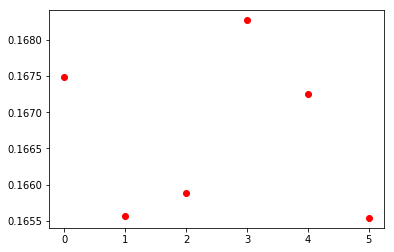

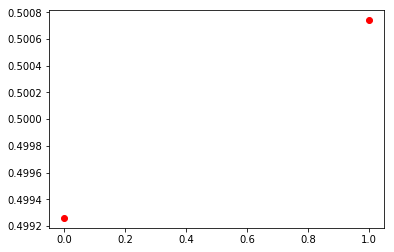

In [90]:
plt.plot(px,'ro')
plt.figure(2)
plt.plot(py,'ro')


## Joint Probability
We compute the joint probability of the two random variables. Pr(x,y)
If we observe multiple paired instances of x and y, then some combinations of the two outcomes occur more frequently than
others.
The total probability of all outcomes (summing over discrete variables and integrating over continuous ones) is always one.

In [91]:
def PrJoint(x,y):
    n_cases_x=np.unique(x).shape[0]
    n_cases_y=np.unique(y).shape[0]
    res=np.zeros((n_cases_x,n_cases_y))
    for i in range(len(x)):
        res[x[i],y[i]]=res[x[i],y[i]]+1
    res/=float(len(x))
    return res
pxy=PrJoint(x,y)
print(pxy)
print(pxy.shape)
print(pxy.sum())

[[0.08323 0.08426]
 [0.08316 0.0824 ]
 [0.08269 0.0832 ]
 [0.08381 0.08446]
 [0.08387 0.08338]
 [0.0825  0.08304]]
(6, 2)
0.9999999999999999


## Marginalization : Also called the sum rule

We can recover the probability distribution of any single variable from a joint
distribution by summing (discrete case) or integrating (continuous case) over all
the other variables.

$$Pr(x)=\sum_{y^* \in \Gamma} Pr(x,y=y^*)$$
$\Gamma$ is the set of all possible values that $y$ can take (0 and 1 here).

In [92]:

def PrMarginalizationgiveny(pxy):
    return pxy.sum(axis=1)
    #px=np.zeros((pxy.shape[0]))
    #for index in range(pxy.shape[1]):
    #    px+=pxy[:,index]
    #return px

pxx=PrMarginalizationgiveny(pxy)
print(px[0:6])
print(px.shape)
print(px.sum())
print(pxx[0:6])
print(pxx.shape)
print(pxx.sum())


[0.16749 0.16556 0.16589 0.16827 0.16725 0.16554]
(6,)
1.0
[0.16749 0.16556 0.16589 0.16827 0.16725 0.16554]
(6,)
0.9999999999999999


## Conditional probability : The product rule

The conditional probability of x given that y takes value y* tells us the relative
propensity of the random variable x to take different outcomes given that the
random variable y is fixed to value y*.

We compute the conditional probability x given y. 
$$Pr(x|y) = \dfrac{Pr(x,y)}{Pr(y)}$$

[[0.16670673 0.16827096]
 [0.16656652 0.16455646]
 [0.16562513 0.16615409]
 [0.16786845 0.16867037]
 [0.16798862 0.16651356]
 [0.16524456 0.16583456]]
(6, 2)
1.0
1.0


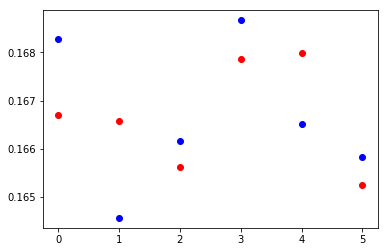

In [93]:

def Prxgiveny(pxy):
    res = np.zeros((pxy.shape[0],pxy.shape[1]))
    for ystar in range(pxy.shape[1]):
        pxystar= pxy[:,ystar]
        pystar=pxy[:,ystar].sum()
        res[:,ystar] = pxystar/pystar
    return res

pxgiveny=Prxgiveny(pxy)
print(pxgiveny)
print(pxgiveny.shape)
print(pxgiveny[:,0].sum())
print(pxgiveny[:,1].sum())
plt.figure(3)
plt.plot(pxgiveny[:,0],'ro',c='red')
plt.plot(pxgiveny[:,1],'ro',c='blue')


## Remark: Pr(x|y=0) is nearly equal to Pr(x|y=1). Pr(x|y)=Pr(x)

The coin value brings no information about the dice value. So x and y are indepent.

## Bayes rule to compute Pr(y|x). Also called the posterior distribution 

From the product rule, together with the symmetry property Pr(x,y) = Pr(y,x), we immediately obtain the following relationship between conditional probabilities.
$$Pr(x,y)=Pr(y,x) $$
$$Pr(x[y)Pr(y)=Pr(y[x)Pr(x) $$
$$Pr(y[x)=\dfrac{Pr(x[y)Pr(y)}{Pr(x)} $$

Pr(x)=evidence, Pr(x|y)=likelihood, Pr(y)=prior

[[0.49692519 0.50307481]
 [0.50229524 0.49770476]
 [0.49846284 0.50153716]
 [0.49806858 0.50193142]
 [0.50146487 0.49853513]
 [0.49836897 0.50163103]]
(6, 2)
1.0


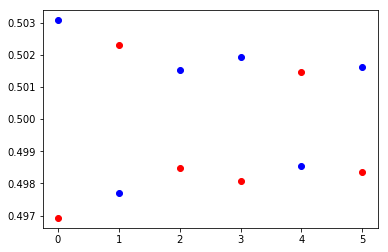

In [94]:
def BayesRule(pxgiveny,px,py):
    num=np.multiply(pxgiveny,py.T)
    pygivenx=num[:,].copy()
    pygivenx[:,0]=num[:,0]*(1/px)
    pygivenx[:,1]=num[:,1]*(1/px)
    return pygivenx

pygivenx=BayesRule(pxgiveny,px,py)
print(pygivenx[0:6])
print(pygivenx.shape)
print(pygivenx[0,].sum())
plt.plot(pygivenx[:,0],'ro',c='red')
plt.plot(pygivenx[:,1],'ro',c='blue')
#plt.plot(pygivenx.max(axis=1),'ro',c='yellow')



## Remark: observing the dice value does not help to predict the coin value

Pr(y|x)=0.5 for all values of x

# Application to skin detection from a gray image


## Read skin/not skin pixels file
A pixel data set is available here : 
Pixel dataset : https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation#

In [95]:
#This function reads a text file containing pixels classified as skin or not skin by a human.
# red, blue, green pixel values are averaged
#returns x and y values. x are pixel values (gray) and y are the classe 0=skin and 1=not skin
def readSkinNonSkinFileGray(filename):
    fichier = open(filename, 'rU')
    lines = fichier.readlines()
    x=np.zeros(len(lines))
    y=np.zeros(len(lines))
    
    # lecture ligne a ligne
    i=0
    for line in lines :
        #print(line)
        lineSplit = line.split("\t")
        B=int(lineSplit[0])
        G=int(lineSplit[1])
        R=int(lineSplit[2])
        classe=int(lineSplit[3])
        x[i]=int((R+G+B)/3.0)
        y[i]=int(classe-1)
        i=i+1
    return x.astype(np.uint8),y.astype(np.uint8)

x,y=readSkinNonSkinFileGray('Skin_NonSkin.txt')
print(x.shape)
print(x[0:10])
#print(y.shape)
#mask=1-y
#skin=x*mask
#print(skin.shape)
#plt.imshow(skin[0:214*277].reshape(((277, 214))),cmap='gray')


C:\Users\raveaux\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 'U' mode is deprecated
  """


(245057,)
[94 93 92 90 90 89 90 90 96 96]


Display skin pixels

(245057,)


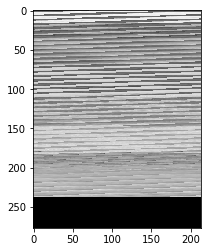

In [96]:
mask=1-y
skin=x*mask
print(skin.shape)
plt.imshow(skin[0:214*277].reshape(((277, 214))),cmap='gray')


Compute distributions of x and y. Pr(x) and Pr(y)

(256,)
1.0
[0.20753947 0.79246053]
(2,)
1.0


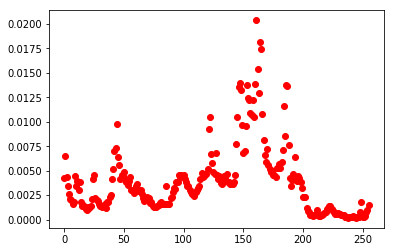

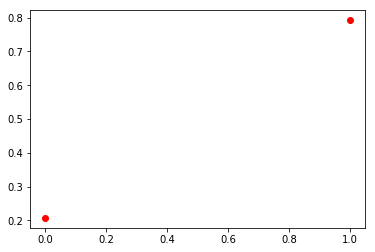

In [97]:
px=Pr(x)
py=Pr(y)
print(px.shape)
print(px.sum())
print(py[0:2])
print(py.shape)
print(py.sum())
plt.plot(px,'ro')
plt.figure(2)
plt.plot(py,'ro')



### The skin class has less samples only 20%
## Compute joint distribution Pr(x,y)

In [98]:
pxy=PrJoint(x,y)
print(pxy.shape)
print(pxy.sum())


(256, 2)
1.0


# Compute conditional distribution Pr(x|y): likelihood

(256, 2)
1.0
1.0


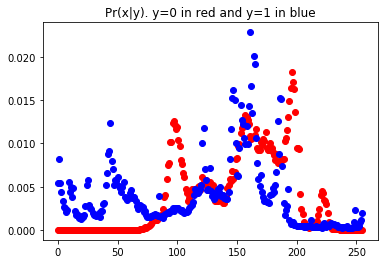

In [99]:
pxgiveny=Prxgiveny(pxy)
print(pxgiveny.shape)
print(pxgiveny[:,0].sum())
print(pxgiveny[:,1].sum())
plt.figure(3)
plt.title("Pr(x|y). y=0 in red and y=1 in blue")
plt.plot(pxgiveny[:,0],'ro',c='red')
plt.plot(pxgiveny[:,1],'ro',c='blue')


## Compute posterior distribution Pr(y|x) thanks to baye"s rule

(256, 2)
1.0


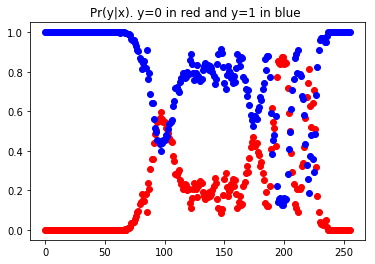

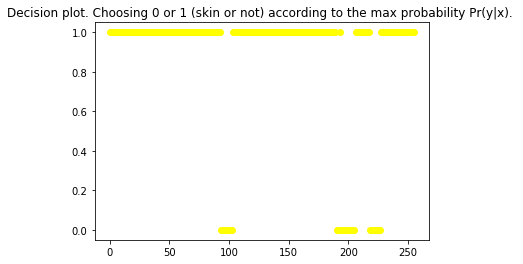

In [100]:
pygivenx=BayesRule(pxgiveny,px,py)
print(pygivenx.shape)
print(pygivenx[0,:].sum())
plt.figure(4)
plt.title("Pr(y|x). y=0 in red and y=1 in blue ")
plt.plot(pygivenx[:,0],'ro',c='red')
plt.plot(pygivenx[:,1],'ro',c='blue')
plt.figure(5)
plt.title("Decision plot. Choosing 0 or 1 (skin or not) according to the max probability Pr(y|x). ")
plt.plot(pygivenx.argmax(axis=1),'ro',c='yellow')


## Maximum a posteriori (MAP) classification. 
## Use the posterior distribution to classify pixel as skin or not
$$max_y Pr(y|x)$$

In [101]:
ypred=pygivenx[x].argmax(axis=1)
classif=np.abs(ypred-y).sum()
print("Number of incorrectly classify pixels:",classif)
print("Ratio of incorrectly classify pixels (error rate):",classif/len(ypred))

Number of incorrectly classify pixels: 43558
Ratio of incorrectly classify pixels (error rate): 0.17774640185752702


## Another way to compute p(y|x)

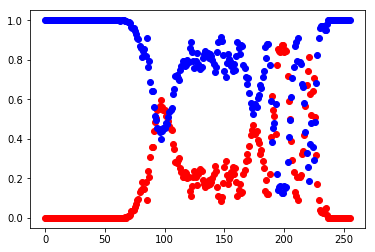

In [102]:
pyx=PrJoint(y,x)
pygivenxother=Prxgiveny(pyx)
plt.figure(4)
plt.plot(pygivenxother[0,:],'ro',c='red')
plt.plot(pygivenxother[1,:],'ro',c='blue')


# Maximum likelihood skin detector 
$$ max_y Pr(x|y)$$

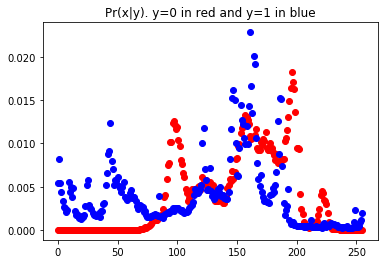

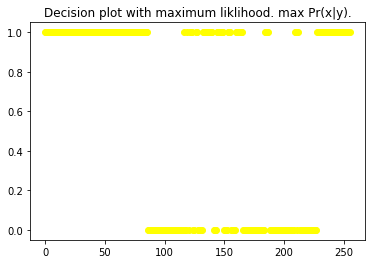

In [103]:
plt.figure(3)
plt.title("Pr(x|y). y=0 in red and y=1 in blue")
plt.plot(pxgiveny[:,0],'ro',c='red')
plt.plot(pxgiveny[:,1],'ro',c='blue')
plt.figure(4)
plt.title("Decision plot with maximum liklihood. max Pr(x|y).")
plt.plot(pxgiveny.argmax(axis=1),'ro',c='yellow')



## Maximum likelihood classification. 
## Use the likelihood  distribution to classify pixel as skin or not
$$max_y Pr(x|y)$$

In [104]:
ypred=pxgiveny[x].argmax(axis=1)
classif=np.abs(ypred-y).sum()
print("Number of incorrectly classify pixels:",classif)
print("Ratio of incorrectly classify pixels (error rate):",classif/len(ypred))

Number of incorrectly classify pixels: 74055
Ratio of incorrectly classify pixels (error rate): 0.30219499953072143


# !!!!!!!!!! Disclaimer : all this results should be tested on a test data set not only on the training data set  !!!!!!!!!!!!

# On this database the maximum a posteriori is better than the maximum likelihood

# Let'us see on an image
face.png image from http://graphics.cs.msu.ru/ru/node/899


238
(214, 277)


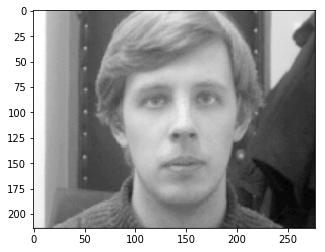

In [105]:
import imageio

#read an image
image = imageio.imread('./' + "face.png")
#convert to int
image=(image).astype(np.uint8)
#removing the alpha channel
image=image[:,:,0:3]
imgray=image.mean(axis=2).astype(np.uint8)
print(imgray[0,0])
print(imgray.shape)
plt.imshow(imgray,cmap='gray')


# Skin detection with Maximum a posteriori (MAP). Naive bayes classifier
## Black pixels are skin pixels

No handles with labels found to put in legend.


(214, 277)
(214, 277)


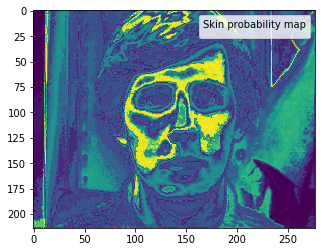

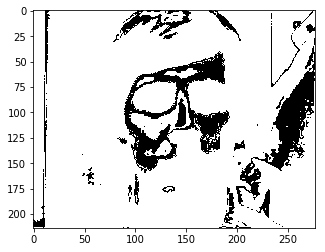

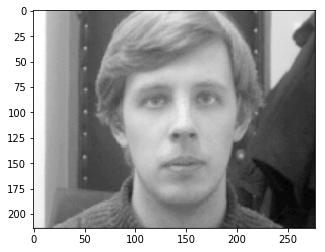

In [106]:
print(pygivenx[imgray[:,:],0].shape)
imskin=pygivenx[imgray[:,:]]
plt.imshow(imskin[:,:,0])
plt.legend(title='Skin probability map')
plt.figure(6)
plt.imshow(imskin.argmax(axis=2),cmap='gray')
print(np.round(imskin[:,:,0]).shape)
plt.figure(7)
plt.imshow(imgray,cmap='gray')


## Skin detection with the maximum likelihood. 
## Black pixels are skin pixels

(214, 277, 2)
1


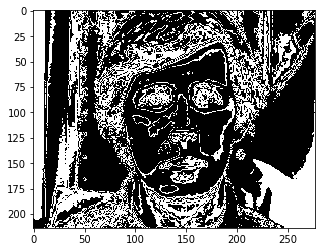

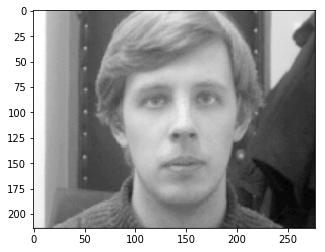

In [107]:

plt.figure(5)
print(pxgiveny[imgray[:,:]].shape)
imskin=(pxgiveny[imgray[:,:]].argmax(axis=2))
print(imskin[0,0])
plt.imshow(imskin,cmap='gray')
plt.figure(7)
plt.imshow(imgray,cmap='gray')


## Visually speaking, the posterior distribution seems to better predict the skin or not skin value than the maximum likelihood predictor

# An introduction to fitting probability models: Maximum likelihood, Maximum a posteriori

The probabilities of observing the $K$ outcomes are held in a $K \times 1$ parameter
vector $\Lambda = [\lambda_1,\lambda_2,\cdots,\lambda_K]$, where $\lambda_k \in [0, 1]$ and $\sum_{k=1}^K \lambda_k =1$. The categorical distribution can be visualized as a normalized histogram with $K$ bins and can be written as 
$$Pr(x = k) = \lambda_k$$.



For short, we use the notation $$Pr(x) = Cat_x [\Lambda]$$ :


We considered discrete data $\{ x_i\}_{i=1}^I$ with $x_i \in \{0,\cdots, 255 \}$.
This could represent observed gray-level pixels. We
described the data using a categorical distribution (normalized histogram) where
$$Pr(x = k|\lambda_{1 , \cdots, K}) = \lambda_k$$.

## Maximum likelihood 

For the ML and MAP techniques, we estimate the 256 parameters $\Lambda=\{ \lambda_k\}_{k=0}^{255}$
 

To find the maximum likelihood solution, we maximize the product of the likelihoods for each individual data point with respect to the parameters $\{ \lambda_k\}_{k=0}^{255}$
$$\hat{\Lambda}= arg \max_{\Lambda} \prod_{i=1}^I Pr(x_i|\Lambda) \text{  s.t.  }  \sum_k \lambda_k =1$$ 

We set the derivatives equal to zero, and solve for $\lambda_k$ to obtain : 
$$\hat{\lambda_k}=\frac{N_k}{\sum_{l=0}^{255} N_l} $$
In other words, $\lambda_k$ is the proportion of times that we observed bin k.

## Maximum a posteriori 

$$\hat{\Lambda}= arg \max_{\Lambda} \prod_{i=1}^I Pr(x_i|\Lambda) Pr(\Lambda) \text{  s.t.  }  \sum_k \lambda_k =1$$ 




# A word about discriminative and generative models
Pr(x|y) is called a generative model. It tries to model the distribution of x (the data).


Pr(y|x) is a discriminative model if the distribution of x is never computed. It does not model x. It tries directly to discriminate y according to x. 




# Conclusion

We have presented an introduction to probability with an application to skin detection. 
Maximum a posteriori and maximum likelihood predictions were presented. 

## To be continued .... From gray to RGB distribution
Let's try to model not only the distributions of gray pixels but the distributions of RGB values. 
R,G,B are three random variables

In [108]:
#This function reads a text file containing pixels classified as skin or not skin by a human.
# red, blue, green pixel values are averaged
#returns x and y values. x are pixel values (R,G,B) and y are the classe 0=skin and 1=not skin
def readSkinNonSkinFileRGB(filename):
    fichier = open(filename, 'rU')
    lines = fichier.readlines()
    r=np.zeros(len(lines))
    g=np.zeros(len(lines))
    b=np.zeros(len(lines))
    y=np.zeros(len(lines))
    
    # lecture ligne a ligne
    i=0
    for line in lines :
        #print(line)
        lineSplit = line.split("\t")
        B=int(lineSplit[0])
        G=int(lineSplit[1])
        R=int(lineSplit[2])
        classe=int(lineSplit[3])
        r[i]=int(R)
        g[i]=int(G)
        b[i]=int(B)
        y[i]=int(classe-1)
        i=i+1
    return r.astype(np.uint8),g.astype(np.uint8),b.astype(np.uint8),y.astype(np.uint8)

r,g,b,y=readSkinNonSkinFileRGB('Skin_NonSkin.txt')
rgb=np.vstack((r,g))
rgb=np.vstack((rgb,b))
rgb=rgb.T
print(r.shape)
print(r[0:10])
print(g.shape)
print(g[0:10])
print(b.shape)
print(b[0:10])
print(rgb.shape)
pr=Pr(r)
pg=Pr(g)
pb=Pr(b)

C:\Users\raveaux\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 'U' mode is deprecated
  """


(245057,)
[123 122 121 119 119 118 119 119 125 125]
(245057,)
[85 84 83 81 81 80 81 81 87 87]
(245057,)
[74 73 72 70 70 69 70 70 76 76]
(245057, 3)


# Display skin pixel distribution

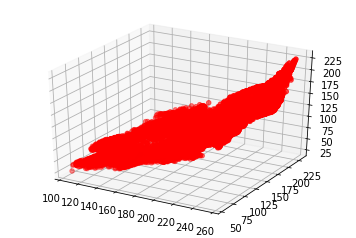

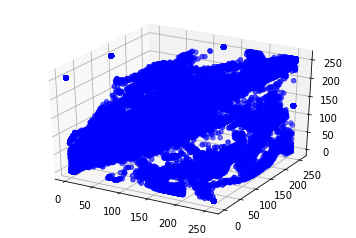

In [109]:
skinindex=np.where(y==0)
noskinindex=np.where(y==1)


from mpl_toolkits import mplot3d
plt.figure(3)

ax = plt.axes(projection='3d')
#ax.plot(prgbgiveny[:,:,:,0])
ax.scatter(rgb[skinindex,0],rgb[skinindex,1],rgb[skinindex,2],c='red');

plt.figure(4)
ax = plt.axes(projection='3d')
#ax.plot(prgbgiveny[:,:,:,0])
ax.scatter(rgb[noskinindex,0],rgb[noskinindex,1],rgb[noskinindex,2],c='blue');


# Joint distribution of three variables


In [110]:
def PrJointrgb(r,g,b):
    n_cases_r=np.unique(r).shape[0]
    n_cases_g=np.unique(g).shape[0]
    n_cases_b=np.unique(b).shape[0]
    
    res=np.zeros((n_cases_r,n_cases_g,n_cases_b))
    for i in range(len(r)):
        res[r[i],g[i],b[i]]=res[r[i],g[i],b[i]]+1
    res/=float(len(r))
    return res
prgb=PrJointrgb(r,g,b)
print(prgb.shape)
print(prgb.sum())

(256, 256, 256)
1.0000000000000024


# Joint distribution of four variables


In [111]:
def PrJointrgby(r,g,b,y):
    n_cases_r=np.unique(r).shape[0]
    n_cases_g=np.unique(g).shape[0]
    n_cases_b=np.unique(b).shape[0]
    n_cases_y=np.unique(y).shape[0]
    res=np.zeros((n_cases_r,n_cases_g,n_cases_b,n_cases_y))
    for i in range(len(r)):
        res[r[i],g[i],b[i],y[i]]=res[r[i],g[i],b[i],y[i]]+1
    res/=float(len(r))
    return res
prgby=PrJointrgby(r,g,b,y)
print(prgby.shape)
print(prgby.sum())
print(len(r))

(256, 256, 256, 2)
1.000000000000014
245057


## The conditional distribution

In [112]:
def Prrgbgiveny(prgby):
    res = np.zeros((prgby.shape))
    for ystar in range(prgby.shape[3]):
        prgbystar= prgby[:,:,:,ystar]
        pystar=prgby[:,:,:,ystar].sum()
        res[:,:,:,ystar] = prgbystar/pystar
    return res

prgbgiveny=Prrgbgiveny(prgby)

print(prgbgiveny.shape)
print(prgbgiveny[:,:,:,0].sum())
print(prgbgiveny[:,:,:,1].sum())
print(prgbgiveny[:,:,:,0].shape)
print(prgby.shape[3])



(256, 256, 256, 2)
0.9999999999999996
0.9999999999999911
(256, 256, 256)
2


# Bayes rule

(256, 256, 256, 2)
(256, 256, 256, 2)
[0.         0.99051823]
(214, 277, 3)
(214, 277)


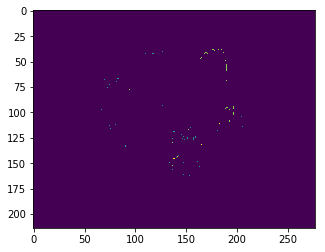

In [113]:
def BayesRuleRGB(prgbgiveny,prgb,py):
    num=np.multiply(prgbgiveny,py.T)
    print(num.shape)
    pygivenrgb=num.copy()
    pygivenrgb[:,:,:,0]=num[:,:,:,0]/(prgb[:,:,:]+0.00001)
    pygivenrgb[:,:,:,1]=num[:,:,:,1]/(prgb[:,:,:]+0.00001)
    return pygivenrgb

pygivenrgb=BayesRuleRGB(prgbgiveny,prgb,py)
print(pygivenrgb.shape)
print(pygivenrgb[0,0,0,:])

improba=image[:,:,0].copy()
print(image.shape)
improba=pygivenrgb[image[:,:,0],image[:,:,1],image[:,:,2],0]
print(improba.shape)
plt.figure(5)
plt.imshow(improba)





(214, 277)


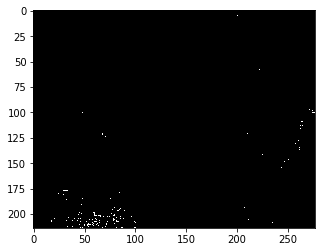

In [114]:
imbina=prgbgiveny[image[:,:,0],image[:,:,1],image[:,:,2]]
imbina=imbina.argmax(axis=2)
imbina=imbina*255
print(imbina.shape)
plt.imshow(imbina,cmap="gray")


In [115]:
ypred=pygivenrgb[r,g,b,:]
print(ypred.shape)
ypred=ypred.argmax(axis=1)
print(ypred.shape)
print(((y-ypred)*(y-ypred)).sum())


(245057, 2)
(245057,)
11


In [116]:
ypred=prgbgiveny[r,g,b,:]
print(ypred.shape)
ypred=ypred.argmax(axis=1)
print(ypred.shape)
print(((y-ypred)*(y-ypred)).sum())


(245057, 2)
(245057,)
11
